In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import mysql.connector
import matplotlib.pyplot as plt

In [2]:
class DataExtrator:
    def __init__(self):
        self.mydb = mysql.connector.connect(
            host="192.168.1.100",
            user="root",
            password="Admin1234!",
            database="web_info"
        )
        self.mycursor = self.mydb.cursor()

    def getRequestInfo(self):
        sqlStr = "select name_id, name from request_info"
        self.mycursor.execute(sqlStr)
        return pd.DataFrame(self.mycursor.fetchall(), columns=['name_id', 'name'])

    def getWebInfo(self, name_id):
        columnsName = ['name_id', 'create_time', 'weibo_follower', 'chaohua_read_yi', 'chaohua_count', 'bili_channel_view_count_yi',
                       'bili_channel_feature_count', 'douyin_ch_user_count', 'douyin_ch_view_count', 'baidu_index_7days_all', 'baidu_index_7days_pc', 'baidu_index_7days_wise']
        sqlStr = f"select name_id, create_time, weibo_follower, chaohua_read_yi, chaohua_count, bili_channel_view_count_yi, \
                bili_channel_feature_count, douyin_ch_user_count, douyin_ch_view_count, baidu_index_7days_all, baidu_index_7days_pc, \
                baidu_index_7days_wise from web_data where name_id = {name_id}"
        self.mycursor.execute(sqlStr)
        return pd.DataFrame(self.mycursor.fetchall(), columns=columnsName)


In [3]:
request_info_df = DataExtrator().getRequestInfo().sort_values('name_id')
request_info_df.to_csv("request_info.csv", index=False)

In [4]:
def dataPlotter(accounts=[1], data_name='weibo_follower', need_diff=True, days=30):
    plt.figure(figsize=(40, 10))
    extractor = DataExtrator()
    for account in accounts:
        accountData = extractor.getWebInfo(account)
        normal = accountData[data_name]
        diff = np.concatenate([[None], np.diff(accountData[data_name])])
        if (need_diff):
            plt.plot(accountData['create_time'][-days:],
                     diff[-days:], '-o', label=account)
        else:
            plt.plot(accountData['create_time'][-days:],
                     normal[-days:], '-o', label=account)
        plt.xticks(accountData['create_time'][-days:], rotation=45)
    plt.title(data_name)
    plt.legend()

In [5]:
def showPlots(days=30):
    dataPlotter(data_name='weibo_follower', days=days)
    dataPlotter(data_name='chaohua_read_yi', days=days)
    dataPlotter(data_name='chaohua_count', days=days)
    dataPlotter(data_name='bili_channel_view_count_yi', days=days)
    dataPlotter(data_name='douyin_ch_user_count', days=days)
    dataPlotter(data_name='douyin_ch_view_count', days=days)

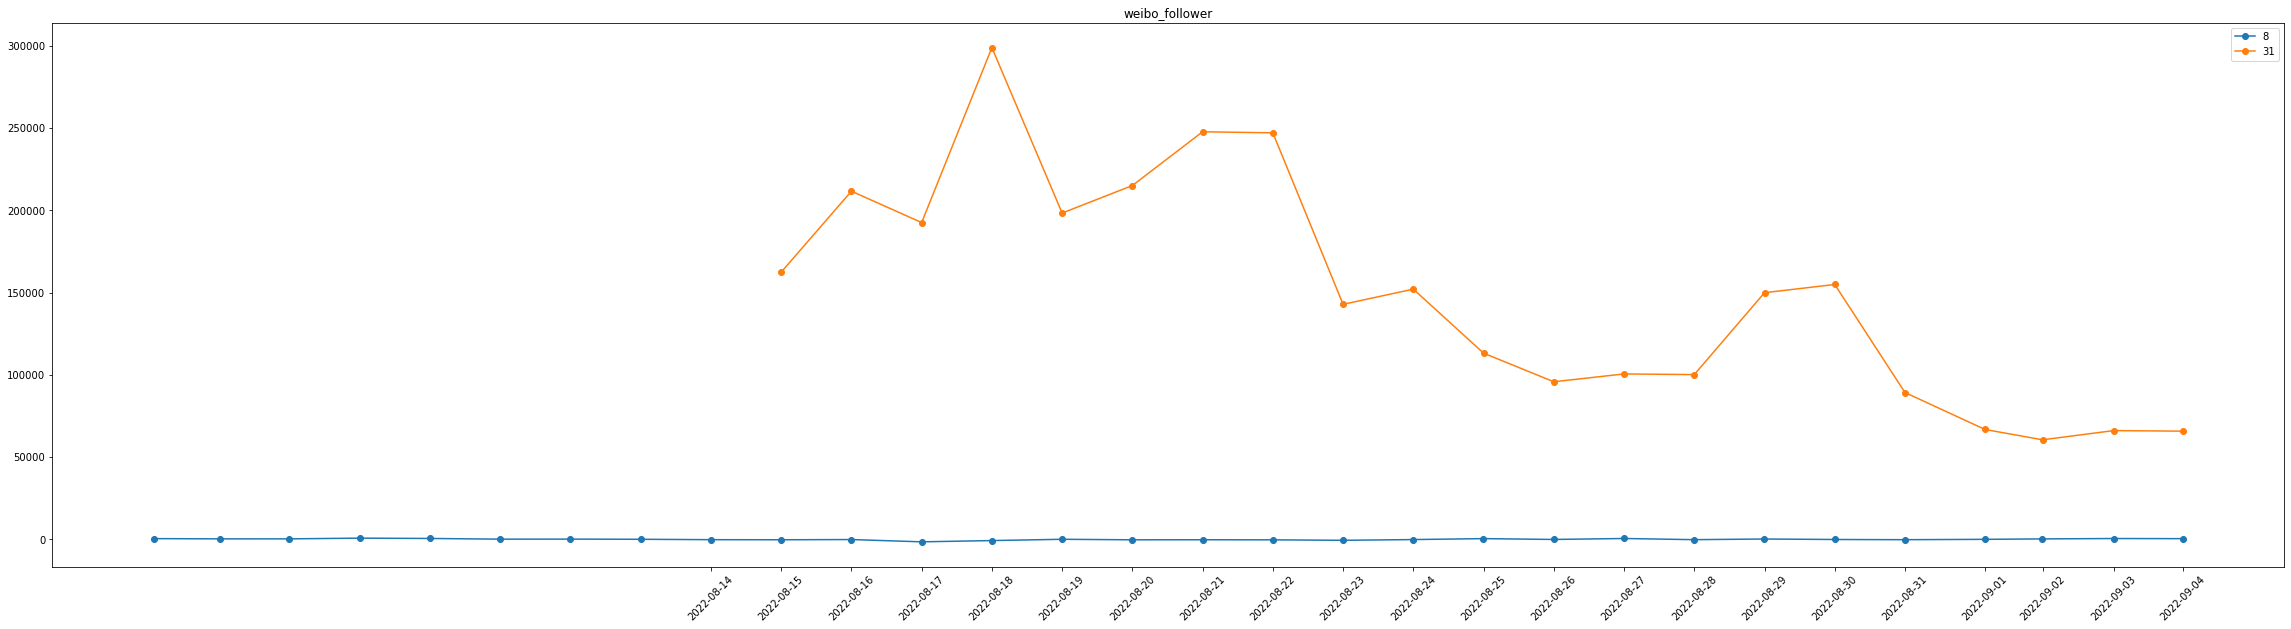

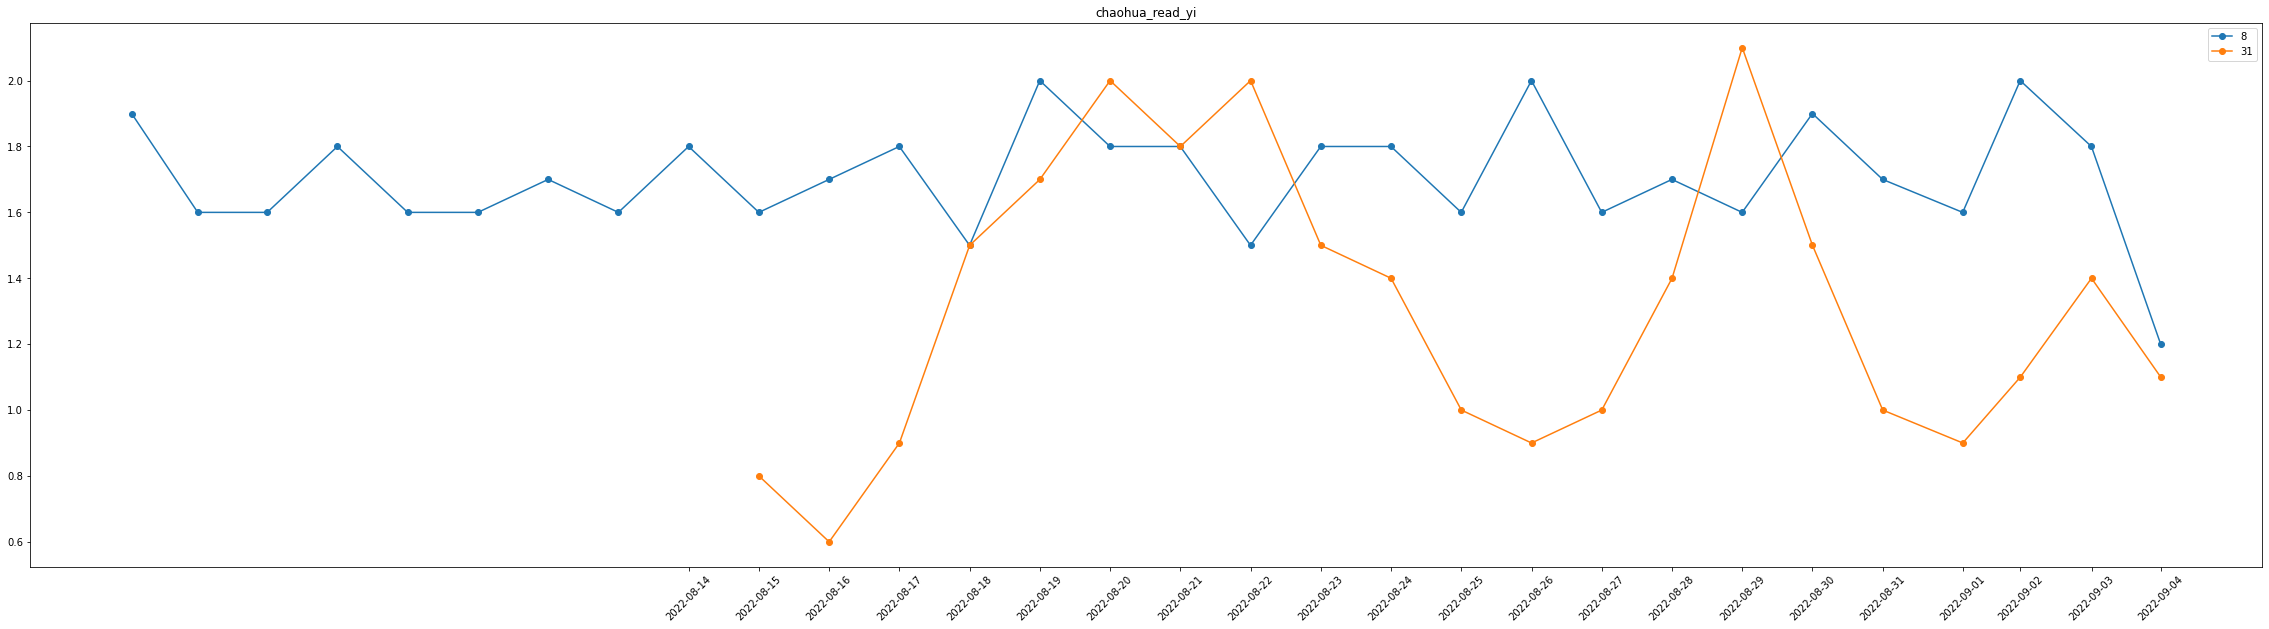

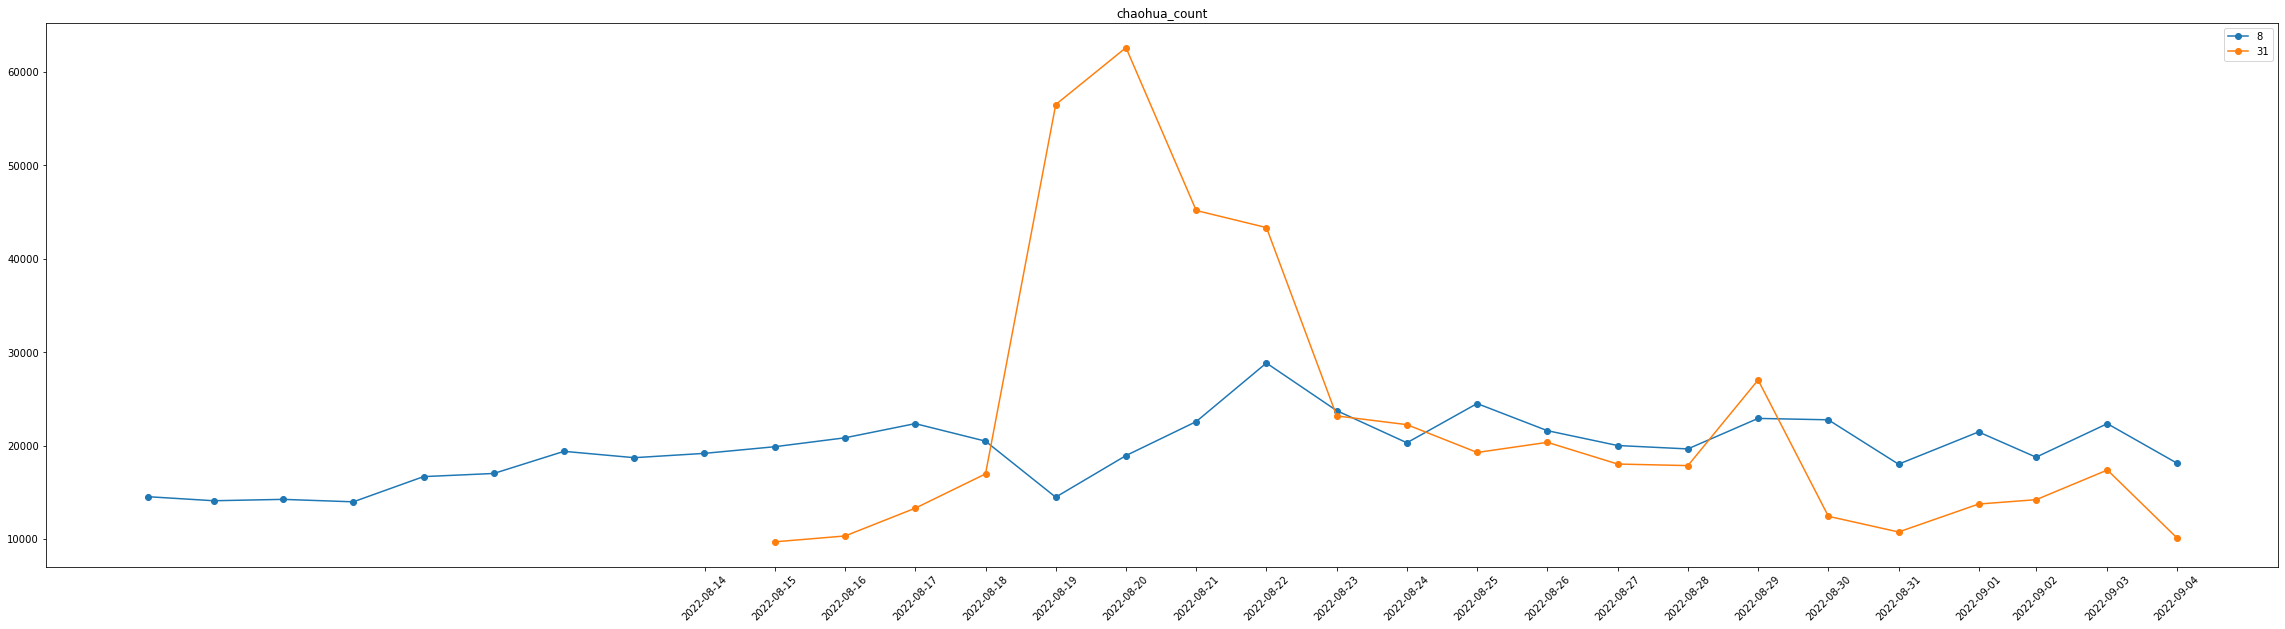

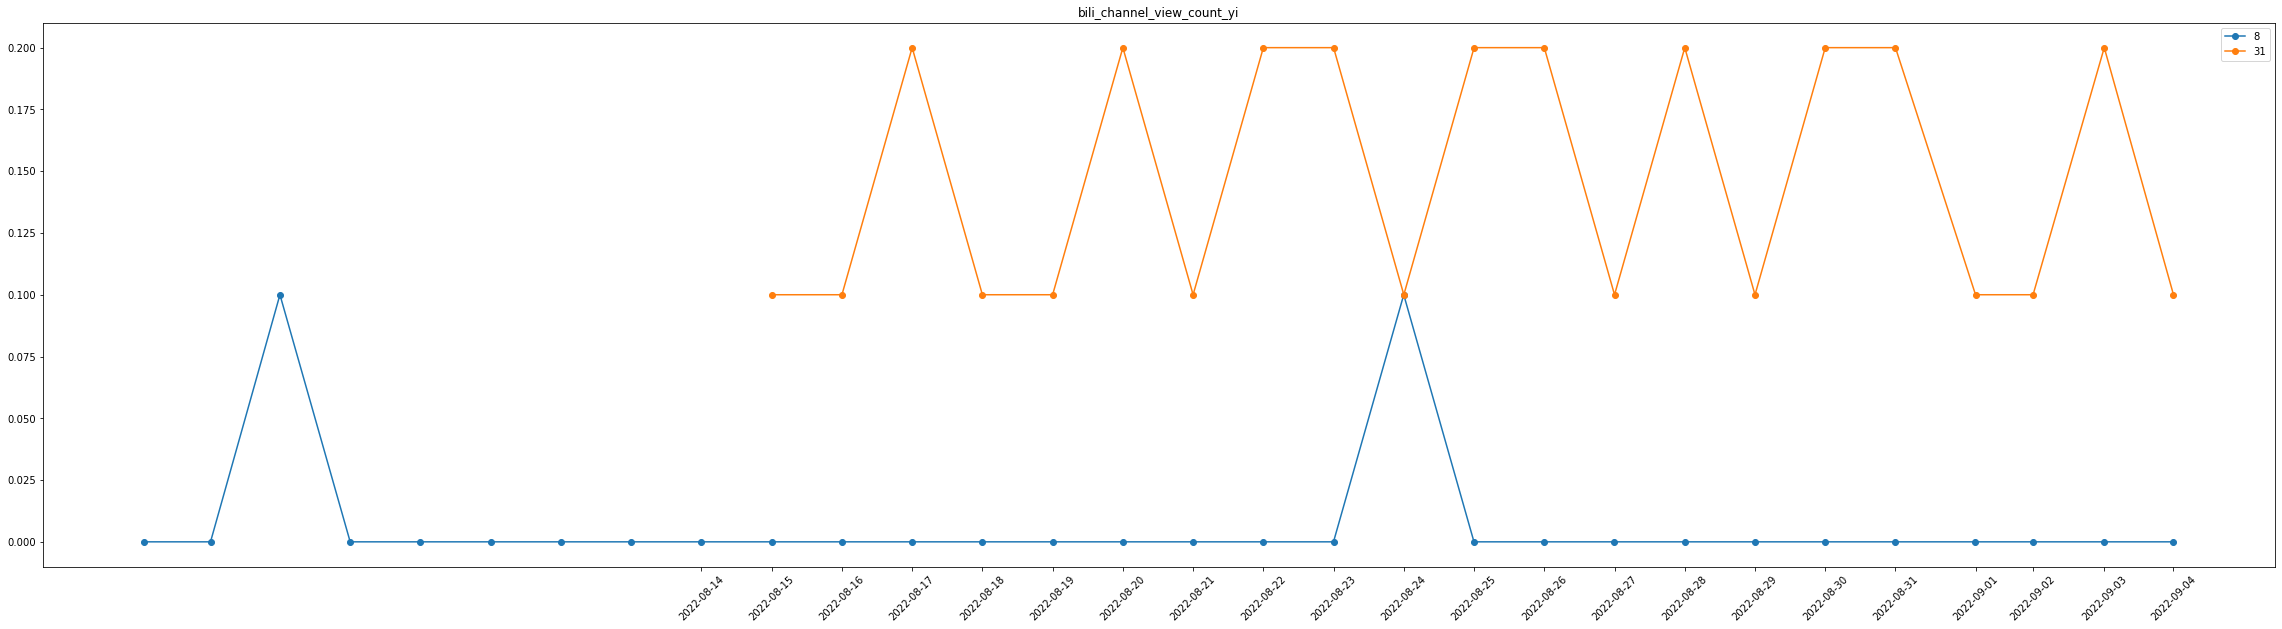

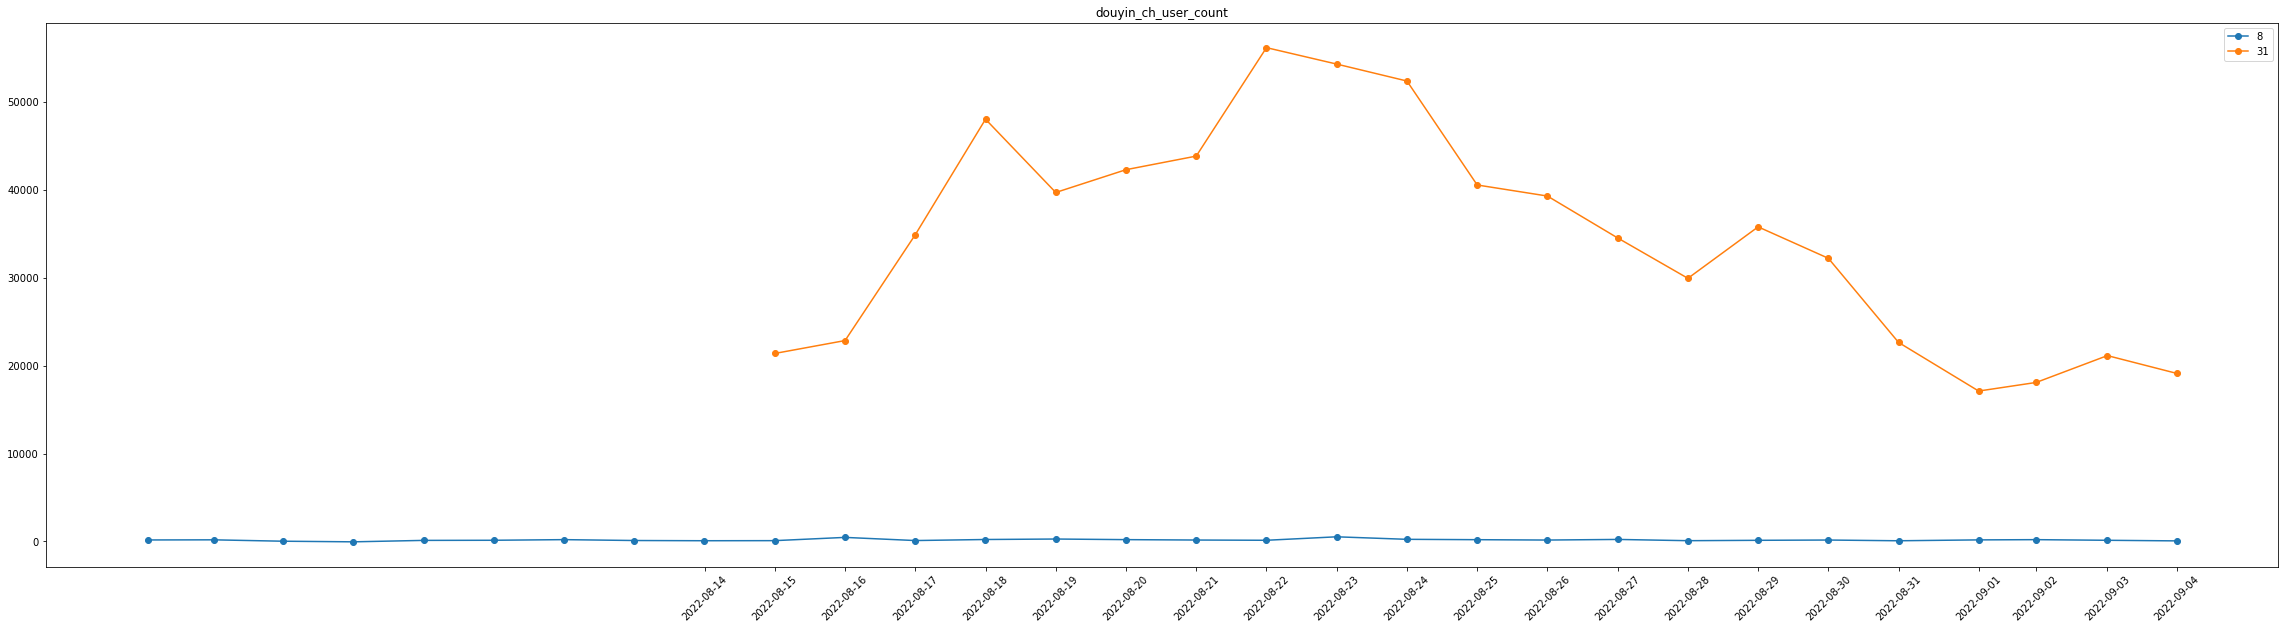

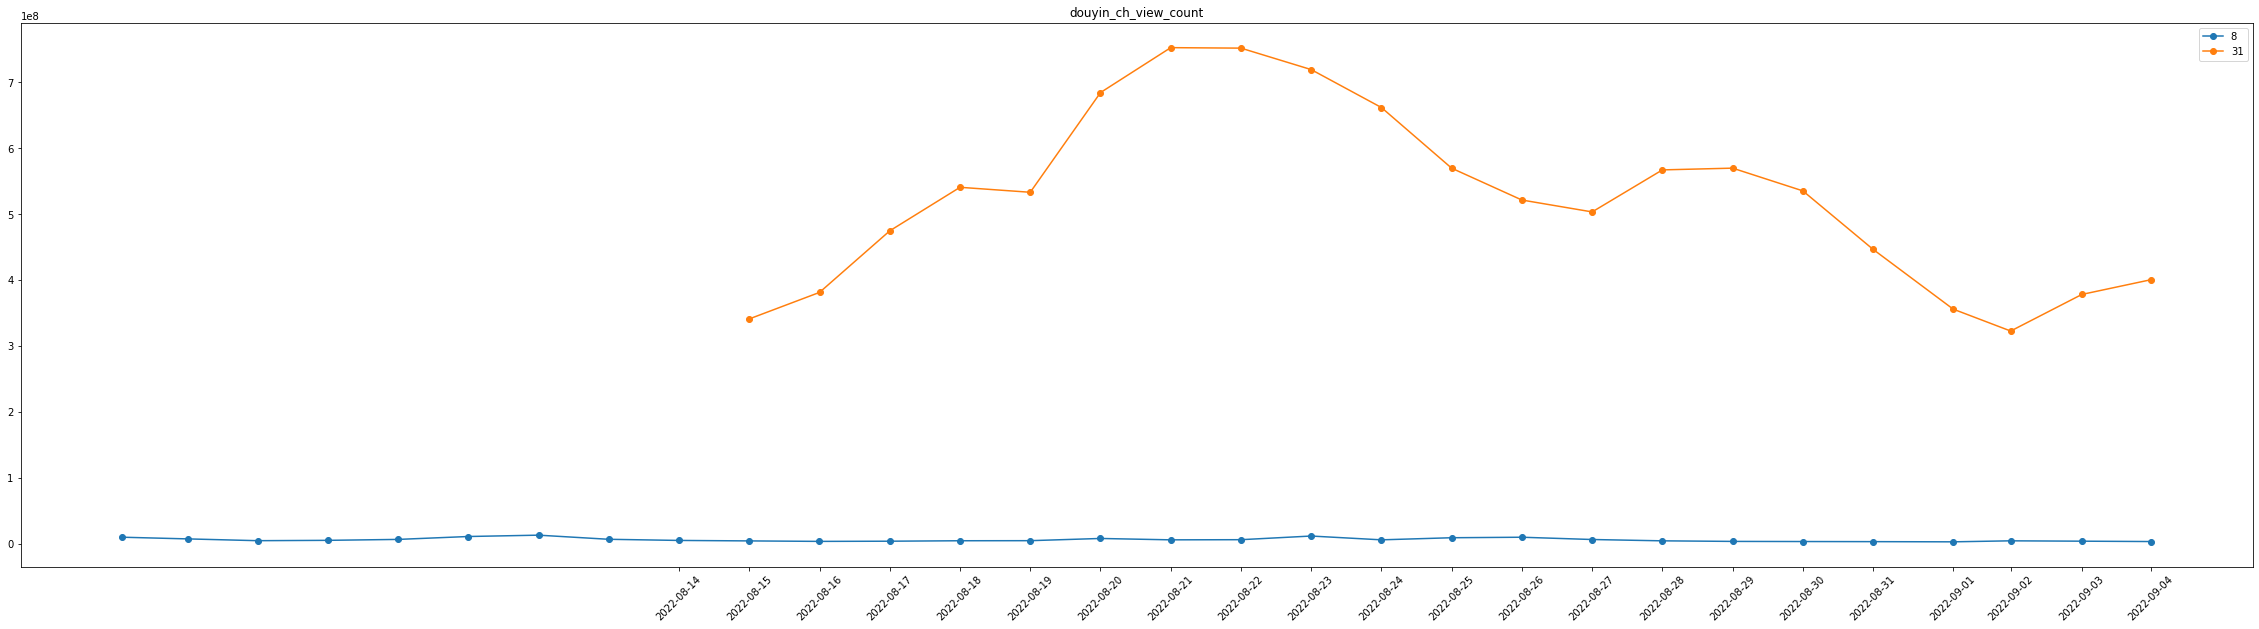

In [6]:
showPlots()